In [1]:
import pkg_resources

# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import date

#Import Model Packages 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

#Package for optimization of mean variance optimization
import cvxopt as opt
from cvxopt import blas, solvers

#Import Model Packages 
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA
from scipy.stats import pearsonr

# Import Data (Will Need Constant Updating)

In [2]:
links = ["https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_aave_20220217141248.csv",
        "https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_arweave_20220217141326.csv",
        "https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_avalanche_20220217141407.csv",
        "https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_chainlink_20220217141458.csv",
        "https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_curve_20220217141532.csv",
        "https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_ethereum_20220217141205.csv",
        "https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_polkadot_20220217141606.csv",
        "https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_solana_20220217141642.csv",
        "https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_terra_20220217141718.csv",
        "https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_uniswap_20220217141750.csv",
        "https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_yearn-finance_20220217141826.csv"]

names = ["AAVE",
        "AR",
        "AVAX",
        "LINK",
        "CRV",
        "ETH",
        "DOT",
        "SOL",
        "LUNA",
        "UNI",
        "YFI"]


assets = dict(zip(names, links))

btc_data = pd.read_csv("https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_bitcoin_20220217141050.csv")
btc_data["BTC"] = btc_data["Price (Open)"]
btc_data["BTC"] = btc_data["BTC"].astype(float)
btc_data = btc_data.drop('Price (Open)', axis = 1)

for item in assets:
    df = pd.read_csv(assets[item])
    df[item] = df["Price (Open)"]
    df[item] = df[item].astype(float)
    df = df.drop("Price (Open)", axis = 1)
    
    btc_data = pd.merge(btc_data, df, on="Date")
    
btc_data = btc_data.sort_values("Date")
#btc_data = btc_data[btc_data["Date"] > '2021-01-05']
btc_data


,Date,BTC,AAVE,AR,AVAX,LINK,CRV,ETH,DOT,SOL,LUNA,UNI,YFI
501,2020-10-02,10619.794434,5.369543e-17,4.255105,4.143897,9.652719,0.864276,352.958523,4.343539,2.863960,0.317308,4.241766,22825.234880
500,2020-10-03,10569.169707,5.540526e-17,4.479945,3.913666,9.213403,0.762244,345.810263,4.124243,2.622315,0.328880,3.894549,21135.330000
499,2020-10-04,10544.733277,5.222667e-17,4.167802,4.023051,9.277875,0.765777,346.112723,4.068319,2.547898,0.310087,3.908000,18876.329175
498,2020-10-05,10674.634447,5.408010e-17,4.132743,3.966091,9.393509,0.697090,352.617902,4.177244,2.520634,0.301623,3.727100,19204.542667
497,2020-10-06,10791.637083,4.741281e-17,4.080709,3.988590,9.618589,0.630964,353.720195,4.157965,2.653377,0.310899,3.317725,19187.947931
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-02-13,42237.477471,1.624747e+02,33.281938,81.326583,15.962640,2.875246,2919.702269,18.836624,96.002159,52.163636,10.640777,23167.239047
3,2022-02-14,42078.439047,1.582772e+02,32.184985,77.997462,15.618332,2.747000,2873.161846,18.753749,92.917793,51.702940,10.344295,22901.210731
2,2022-02-15,42553.639358,1.611068e+02,32.459594,81.891672,15.912742,2.905790,2931.131144,18.708730,96.445200,53.831827,10.619434,23094.427410
1,2022-02-16,44586.099380,1.723934e+02,35.092359,93.043347,17.353349,3.184278,3186.083240,20.186286,105.602755,56.871592,11.479588,24486.154690


<AxesSubplot:title={'center':'Correlation Matrix'}>

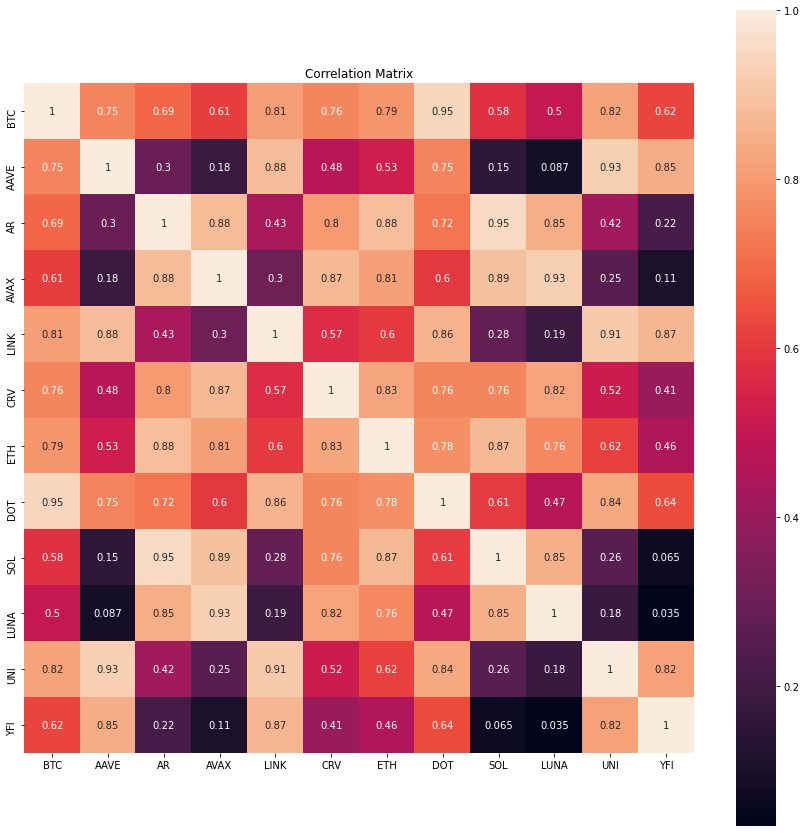

In [3]:
# correlation
correlation = btc_data.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True)

# HRP

In [4]:
X= btc_data.copy('deep')
X = X.set_index(['Date'])
row= len(X)

X_train = X
X_test = X

#Calculate percentage return 
returns = X_train.pct_change().dropna()
returns_test=X_test.pct_change().dropna()

## Building Hierarchy Graph/ Dendogram

In [5]:
def correlDist(corr):
    # A distance matrix based on correlation, where 0<=d[i,j]<=1
    # This is a proper distance metric
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist

In [6]:
#Calulate linkage
dist = correlDist(returns.corr())
link = linkage(dist, 'ward')
link[0]

<ipython-input-6-459c7533a8eb>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = linkage(dist, 'ward')


array([4.        , 6.        , 0.48021639, 2.        ])

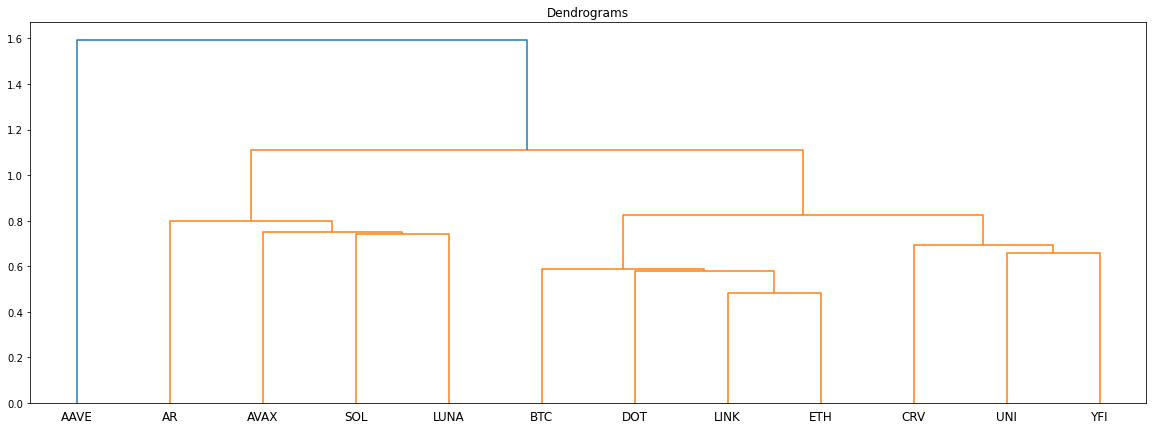

In [7]:
#Plot Dendogram
plt.figure(figsize=(20, 7))
plt.title("Dendrograms")
dendrogram(link,labels = X.columns)
plt.show()

In [8]:
def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    return sortIx.tolist()

In [9]:
def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_=cov.loc[cItems,cItems] # matrix slice
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar



def getRecBipart(cov, sortIx):
    # Compute HRP alloc
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[i]  # cluster 1
            cItems1 = cItems[i + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2
    return w

In [10]:

def getMVP(cov):

    cov = cov.T.values
    n = len(cov)
    N = 100
    mus = [10 ** (5.0 * t / N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(cov)
    #pbar = opt.matrix(np.mean(returns, axis=1))
    pbar = opt.matrix(np.ones(cov.shape[0]))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))  # negative n x n identity matrix
    h = opt.matrix(0.0, (n, 1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    
    # Calculate efficient frontier weights using quadratic programming
    solvers.options['show_progress'] = False
    portfolios = [solvers.qp(mu * S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER    
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S * x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO    
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']

    return list(wt)

def getIVP(cov, **kargs):
    # Compute the inverse-variance portfolio
    ivp = 1. / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

def getHRP(cov, corr):
    # Construct a hierarchical portfolio
    dist = correlDist(corr)
    link = sch.linkage(dist, 'single')
    #plt.figure(figsize=(20, 10))
    #dn = sch.dendrogram(link, labels=cov.index.values)
    #plt.show()
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()
    hrp = getRecBipart(cov, sortIx)
    return hrp.sort_index()

In [11]:
def get_all_portfolios(returns):
    
    cov, corr = returns.cov(), returns.corr()
    hrp = getHRP(cov, corr)
    mvp = getMVP(cov)
    mvp = pd.Series(mvp, index=cov.index)
    portfolios = pd.DataFrame([mvp, hrp], index=['MVP', 'HRP']).T
    #portfolios = pd.DataFrame([ivp, hrp], index=['IVP', 'HRP']).T
    portfolios["BTC"] = 0
    portfolios["BTC"]["BTC"] = 1
    portfolios["Equal"] = 1/(len(btc_data.columns) - 1)
    return portfolios

<ipython-input-12-30c783c4a55c>:62: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
/Users/kinjisteimetz/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:2566: RuntimeWarning: overflow encountered in double_scalars
  x0, x1 = inverse_trans.transform([x0t - delta, x1t + delta])


Eigen portfolio #9 with the highest Sharpe. Return inf%, vol = 3941541054609528193024.00%, Sharpe = 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00
           Return           Vol         Sharpe
9             inf  3.941541e+19  1.797693e+308
7   7.635634e+153  3.317514e+19  2.301613e+134
0    1.734820e+13  7.243609e+16   2.394966e-04
3    2.238247e+13  1.028843e+17   2.175499e-04
1    9.633369e+12  1.024459e+17   9.403368e-05
4    1.991924e+07  2.674435e+17   7.448017e-11
10   1.149725e+07  1.117558e+18   1.028784e-11
5   -9.999996e-01  3.071631e+18  -3.255599e-19


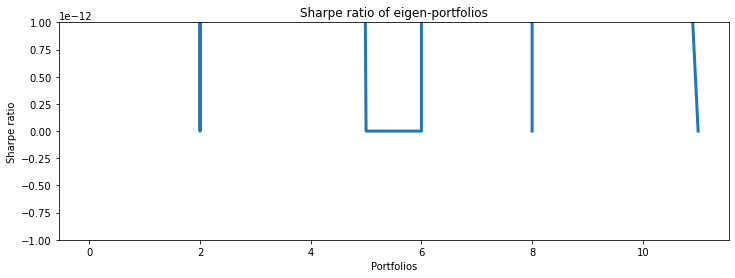

Sum of weights of current eigen-portfolio: 100.00


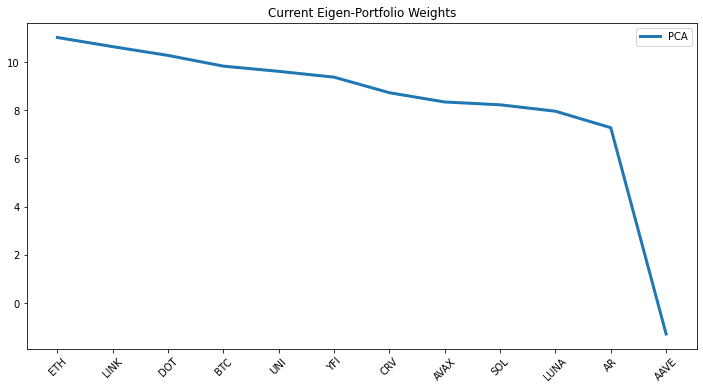

In [12]:
#Load Data
dataset = btc_data
dataset = dataset.set_index(['Date'])

# Daily Log Returns (%)
#datareturns = np.log(dataset / dataset.shift(1)) 

# Daily Linear Returns (%)
datareturns = dataset.pct_change(1)

#Remove Outliers beyong 3 standard deviation
#datareturns= datareturns[datareturns.apply(lambda x :(x-x.mean()).abs()<(3*x.std()) ).all(1)]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(datareturns)
rescaledDataset = pd.DataFrame(scaler.fit_transform(datareturns),columns = datareturns.columns, index = datareturns.index)
# summarize transformed data
datareturns.dropna(how='any', inplace=True)
rescaledDataset.dropna(how='any', inplace=True)

#Breaking Up Data
X_train = rescaledDataset
X_test = rescaledDataset

X_train_raw = datareturns
X_test_raw = datareturns


stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)


#Apply PCA
pca = PCA()
PrincipalComponent=pca.fit(X_train)


def PCWeights():
    '''
    Principal Components (PC) weights for each 28 PCs
    '''
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()


# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=365):
    '''
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.
    
    ts_returns are  returns of a signle eigen portfolio.
    '''
    n_years = ts_returns.shape[0]/periods_per_year
    annualized_return = np.power(np.prod(1+ts_returns),(1/n_years))-1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe


def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.] * n_portfolios)
    sharpe_metric = np.array([0.] * n_portfolios)
    annualized_vol = np.array([0.] * n_portfolios)
    highest_sharpe = 0 
    stock_tickers = rescaledDataset.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfi.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw.loc[:, eigen_prtfi.index], pc_w)
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(), index=X_train_raw.index)
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe
        
        sharpe_metric= np.nan_to_num(sharpe_metric)
        
    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric)

    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100, 
           annualized_vol[highest_sharpe]*100, 
           sharpe_metric[highest_sharpe]))


    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

    results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
    results.dropna(inplace=True)
    results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()

optimizedPortfolio()

weights = PCWeights()
portfolio = portfolio = pd.DataFrame()

def plotEigen(weights, plot=False, portfolio=portfolio):
    portfolio = pd.DataFrame(data ={'PCA': weights.squeeze()*100}, index = stock_tickers) 
    portfolio.sort_values(by=['PCA'], ascending=False, inplace=True)
    if plot:
        print('Sum of weights of current eigen-portfolio: %.2f' % np.sum(portfolio))
        portfolio.plot(title='Current Eigen-Portfolio Weights', 
            figsize=(12,6), 
            xticks=range(0, len(stock_tickers),1), 
            rot=45, 
            linewidth=3
            )
        plt.show()


    return portfolio

# Weights are stored in arrays, where 0 is the first PC's weights.
weights_df = plotEigen(weights=weights[0], plot=True)
weights_df["PCA"] = weights_df["PCA"].astype(float)

for x in weights_df.iterrows():
    if x[1]["PCA"] < 0:
        hold_value = ((0 - x[1]["PCA"]) / (len(weights_df) - 1))
        x[1]["PCA"] = 0
        for x in weights_df.iterrows():
            if x[1]["PCA"] == 0: pass
            else: x[1]["PCA"] = x[1]["PCA"] - hold_value
    else: pass
    
weights_df["PCA"] = weights_df["PCA"].astype(float)
weights_df["PCA"] = weights_df["PCA"] / 100

In [13]:
portfolios = get_all_portfolios(returns)
portfolios = portfolios.sort_index()
portfolios = pd.merge(portfolios, weights_df, left_index = True, right_index = True)
portfolios["Adjusted_ML_Model"] = portfolios["HRP"]
portfolios["Adjusted_ML_Model"]["AAVE"] = 0.025
portfolios["Adjusted_ML_Model"]["LUNA"] = portfolios["Adjusted_ML_Model"]["LUNA"] - 0.025
portfolios_show = portfolios.drop(["PCA", "HRP"], axis = 1)
portfolios_show["ML_Model"] = portfolios["HRP"]
portfolios_show

<ipython-input-10-2e3c92950256>:44: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = sch.linkage(dist, 'single')
<ipython-input-11-0c8a28cd7a18>:5: RankWarning: Polyfit may be poorly conditioned
  mvp = getMVP(cov)
<ipython-input-11-0c8a28cd7a18>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolios["BTC"]["BTC"] = 1
<ipython-input-13-9c46ea4a1958>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolios["Adjusted_ML_Model"]["AAVE"] = 0.025
<ipython-input-13-9c46ea4a1958>:6: SettingWithCopyWarning: 
A value is t

,MVP,BTC,Equal,Adjusted_ML_Model,ML_Model
AAVE,3.461876e-20,0,0.083333,0.025000,0.000000
AR,6.740768e-183,0,0.083333,0.073941,0.073941
AVAX,2.889755e-187,0,0.083333,0.058246,0.058246
BTC,9.422036e-01,1,0.083333,0.289125,0.289125
CRV,1.056764e-187,0,0.083333,0.047945,0.047945
DOT,8.582728e-188,0,0.083333,0.063990,0.063990
ETH,4.877068e-187,0,0.083333,0.094524,0.094524
LINK,1.115751e-187,0,0.083333,0.055636,0.055636
LUNA,7.142754e-188,0,0.083333,0.047126,0.072126
SOL,5.779644e-02,0,0.083333,0.092865,0.092865


In [14]:
portfolios

,MVP,HRP,BTC,Equal,PCA,Adjusted_ML_Model
AAVE,3.461876e-20,0.000000,0,0.083333,0.000000,0.025000
AR,6.740768e-183,0.073941,0,0.083333,0.071585,0.073941
AVAX,2.889755e-187,0.058246,0,0.083333,0.082258,0.058246
BTC,9.422036e-01,0.289125,1,0.083333,0.097141,0.289125
CRV,1.056764e-187,0.047945,0,0.083333,0.086101,0.047945
DOT,8.582728e-188,0.063990,0,0.083333,0.101583,0.063990
ETH,4.877068e-187,0.094524,0,0.083333,0.109033,0.094524
LINK,1.115751e-187,0.055636,0,0.083333,0.105231,0.055636
LUNA,7.142754e-188,0.072126,0,0.083333,0.078430,0.047126
SOL,5.779644e-02,0.092865,0,0.083333,0.081098,0.092865


/Users/kinjisteimetz/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


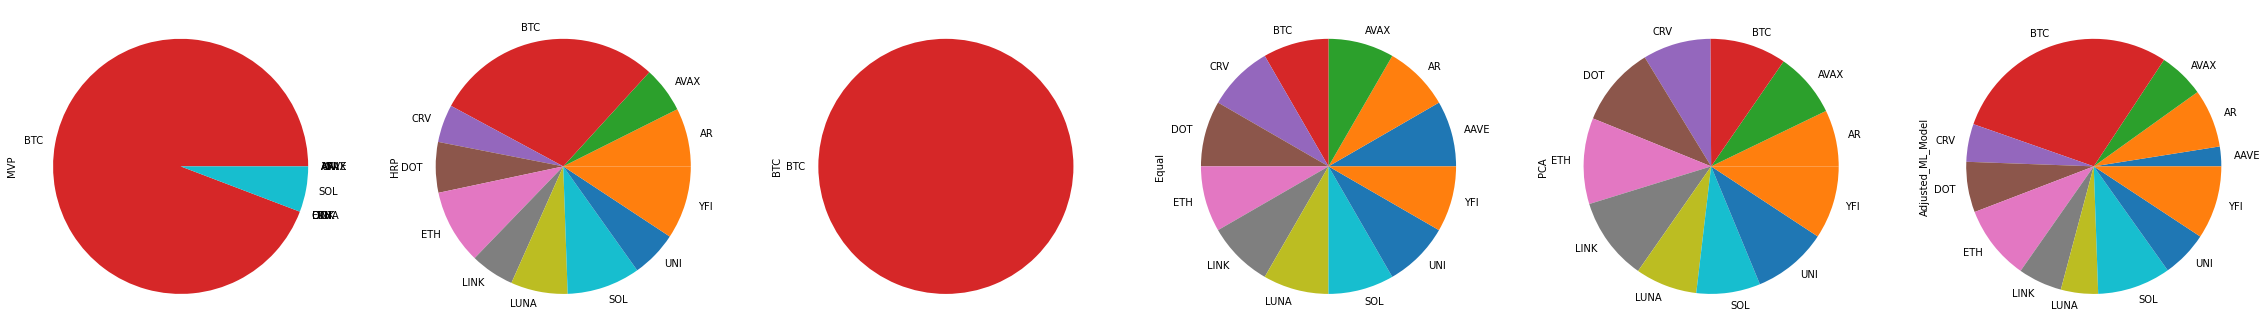

In [15]:
#fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,20))
#ax1.pie(portfolios.iloc[:,0], );
#ax1.set_title('Equal',fontsize = 30)
#ax2.pie(portfolios.iloc[:,1]);
#ax2.set_title('HRP',fontsize = 30)
portfolios.plot.pie(subplots=True, figsize=(40, 20),legend = False);

In [16]:
portfolio_list = portfolios.columns

## Backtesting

In [17]:
df_list = {}
breaker = len(btc_data) - 180

for port_type in portfolio_list:
    #Create a List of the Assets in the Portfolio
    backtest = btc_data[breaker:]
    asset_list = list(backtest.columns)
    asset_list = asset_list[1:]

    #Dictionary of Assets and Weights
    asset_weights = dict(zip(portfolios.index, portfolios[port_type].values))

    #Initiate Portfolio Value Set to 10000
    start_value = 10000

    #Find Count of Assets with Starting Value and Initial Allocation
    asset_starting_values = []
    for x in asset_list:
        asset_allocation = (start_value * asset_weights[x]) / float(backtest.iloc[0][x])
        asset_starting_values.append(asset_allocation)

    #Create a dictionary of Asset Names and Initial Values
    asset_dict = zip(asset_list, asset_starting_values)
    asset_dict = dict(asset_dict)

    #Loop to Rebalance Quarterly
    asset_values = []
    port_value = []
    dates = []

    for index, row in backtest.iterrows():    
        #Calculate Portfolio Value
        dates.append(row["Date"])
        value_holder = []
        for x in asset_list:
            val = float(asset_dict[x]) * float(row[x])
            value_holder.append(val)
        asset_values.append(value_holder)
        total_value = sum(value_holder)
        port_value.append(total_value)

    cluster_qr = pd.DataFrame(np.column_stack([dates, port_value]),
                          columns = ["Date", "Portfolio_Value"])

    cluster_qr["Portfolio_Value"] = cluster_qr["Portfolio_Value"].astype(float)
    cluster_qr["Daily_Return"] = cluster_qr["Portfolio_Value"].pct_change(1)
    cluster_qr["Total_Return(%)"] = ((cluster_qr["Portfolio_Value"] - 10000) / 10000) * 100

    cluster_qr = cluster_qr[1:]
    df_list[port_type] = cluster_qr

In [19]:
#Add DeFi Pulse Index
defi_pulse = pd.read_csv("https://raw.githubusercontent.com/kinji20/Most_Recent_Token_Price/main/historical_data_de-fi-pulse-index_20220217142053.csv")
defi_pulse = defi_pulse.sort_values("Date")
defi_pulse["Daily_Return"] = defi_pulse["Price (Open)"].pct_change(1)
defi_breaker = int(len(defi_pulse) - len(df_list["BTC"]))
defi_pulse = defi_pulse[defi_breaker: ]
defi_pulse = defi_pulse.reset_index(drop = True)
defi_pulse["Total_Return(%)"] = ((defi_pulse["Price (Open)"] - defi_pulse["Price (Open)"].iloc[0]) / defi_pulse["Price (Open)"].iloc[0]) * 100


df_list["DeFi_Pulse"] = defi_pulse

In [20]:
Portfolio = []
Daily_Return = []
Actual_Return = []
StDev = []
Sharp_Ratio = []
Beta = []
Alpha = []

for x in df_list:
    if x == "PCA": pass
    else:
        #Add Name of Portfolio
        if x == "HRP":
            Portfolio.append("ML_Model")
        else:
            Portfolio.append(x)

        #Returns, Sharpe Ratio, Volatility
        returns, volatility, sharpe = sharpe_ratio(df_list[x]["Daily_Return"] , periods_per_year=365)
        Daily_Return.append(round(returns,2))
        StDev.append(round(volatility,2))
        Sharp_Ratio.append(round(sharpe,2))
        Actual_Return.append(round(df_list[x]["Total_Return(%)"].iloc[-1],2))
        


        #BTC Based Beta and BTC Based Alpha
        if x == 'BTC': 
            Beta.append(1)
            Alpha.append(0)
        else:
            cova =  df_list[x]["Daily_Return"].std() / df_list["BTC"]["Daily_Return"].std()
            corr,_ = pearsonr(df_list[x]["Daily_Return"], df_list["BTC"]["Daily_Return"])
            B = cova*corr
            Beta.append(round(B, 2))

            Asset_Alpha = df_list[x]["Total_Return(%)"].iloc[-1] - (B * df_list['BTC']["Total_Return(%)"].iloc[-1])
            Alpha.append(round(Asset_Alpha,2))
    
Sharpe_Ratios = pd.DataFrame(np.column_stack([Portfolio, Daily_Return, Actual_Return,StDev, Beta, Alpha, Sharp_Ratio]), columns = ["Portfolio","Annualised Return (%)", "Realised 6-Month Return (%)","Annualised Volatility", "BTC Based Beta", "BTC Based Alpha", "Sharpe_Ratio"])
Sharpe_Ratios["Annualised Return (%)"] = Sharpe_Ratios["Annualised Return (%)"].astype(float) * 100

Sharpe_Ratios

,Portfolio,Annualised Return (%),Realised 6-Month Return (%),Annualised Volatility,BTC Based Beta,BTC Based Alpha,Sharpe_Ratio
0,MVP,-15.0,-7.48,0.65,0.99,2.68,-0.23
1,ML_Model,14.0,6.71,0.86,1.09,17.89,0.17
2,BTC,-20.0,-10.21,0.64,1.0,0.0,-0.31
3,Equal,14.0,6.77,0.93,1.14,18.37,0.15
4,Adjusted_ML_Model,6.0,2.69,0.85,1.1,13.92,0.07
5,DeFi_Pulse,-81.0,-56.24,0.96,1.1,-44.98,-0.84


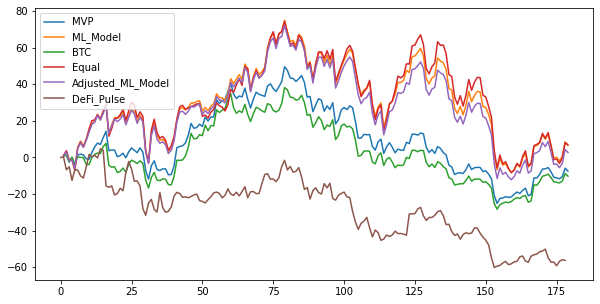

In [21]:
for x in df_list:
    if x == "PCA": pass
    else:
        if x == "HRP": 
            df_list[x]["Total_Return(%)"].plot(figsize=(10, 5), label = "ML_Model")
        else:
            df_list[x]["Total_Return(%)"].plot(figsize=(10, 5), label = x)
        
plt.legend(loc="upper left")

In [22]:
portfolios_show["Adjusted_ML_Model"].sort_values(ascending = False)

BTC     0.289125
ETH     0.094524
SOL     0.092865
YFI     0.092722
AR      0.073941
DOT     0.063990
UNI     0.058881
AVAX    0.058246
LINK    0.055636
CRV     0.047945
LUNA    0.047126
AAVE    0.025000
Name: Adjusted_ML_Model, dtype: float64

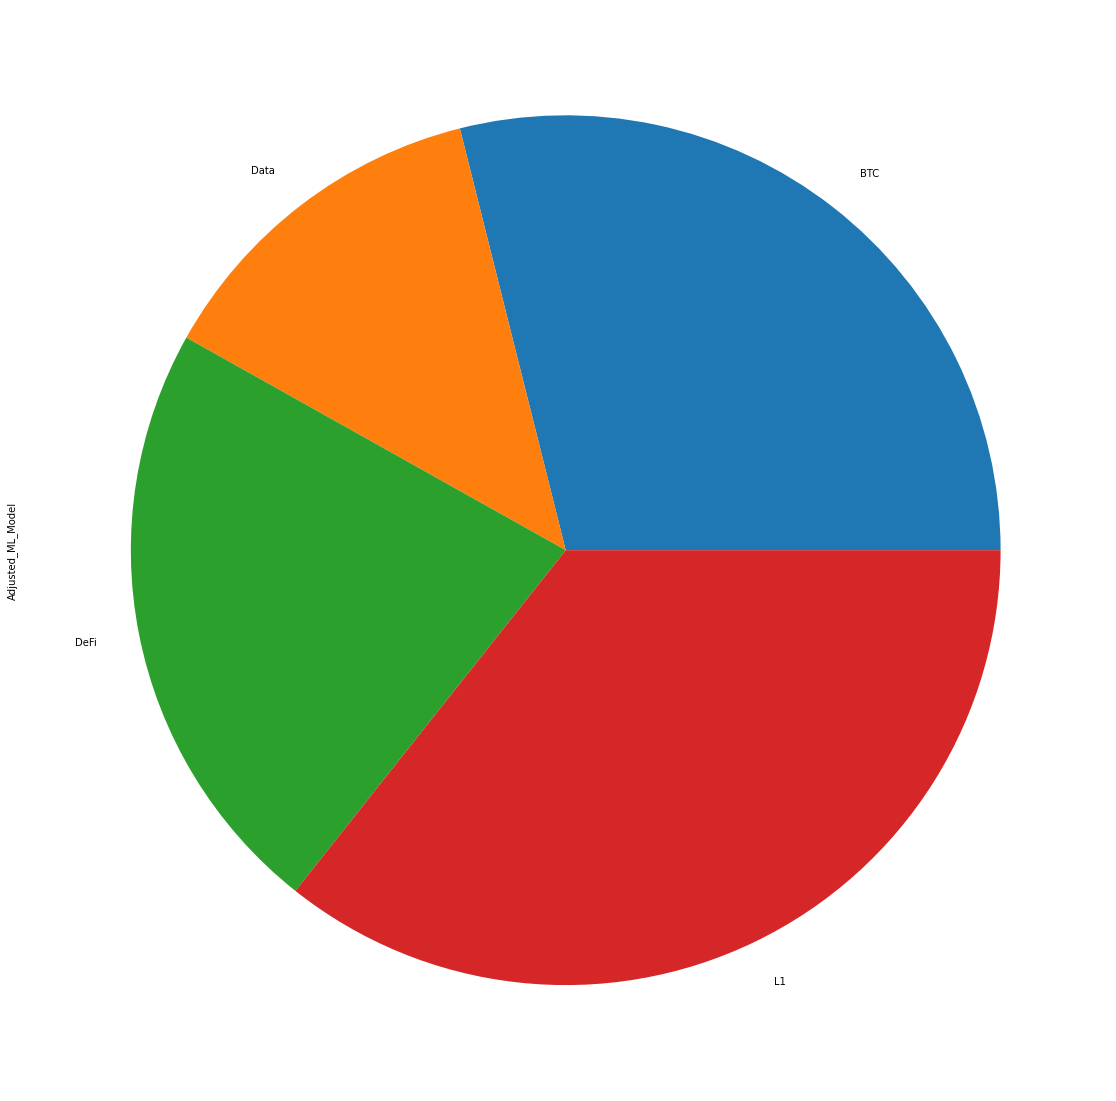

In [23]:
portfolios_show["Category"] = ["DeFi", "Data", "L1", "BTC", "DeFi", "L1", "L1", "Data", "L1", "L1", "DeFi", "DeFi"]
sector_hold = portfolios_show.groupby("Category")["Adjusted_ML_Model"].sum()
sector_hold.plot.pie(subplots=True, figsize=(40, 20),legend = False);

In [24]:
sector_hold.sort_values(ascending = False)

Category
L1      0.356751
BTC     0.289125
DeFi    0.224548
Data    0.129576
Name: Adjusted_ML_Model, dtype: float64

In [25]:
portfolios_show["Adjusted_ML_Model"].sort_values(ascending = False)

BTC     0.289125
ETH     0.094524
SOL     0.092865
YFI     0.092722
AR      0.073941
DOT     0.063990
UNI     0.058881
AVAX    0.058246
LINK    0.055636
CRV     0.047945
LUNA    0.047126
AAVE    0.025000
Name: Adjusted_ML_Model, dtype: float64

In [26]:
portfolios_show[portfolios_show["Category"] == "L1"]["Adjusted_ML_Model"].sort_values(ascending = False)

ETH     0.094524
SOL     0.092865
DOT     0.063990
AVAX    0.058246
LUNA    0.047126
Name: Adjusted_ML_Model, dtype: float64

In [27]:
df_list["Adjusted_ML_Model"].to_csv("/Users/kinjisteimetz/Desktop/portfolio_data.csv")

In [28]:
returnchecker = btc_data[310:]
returnchecker = returnchecker.reset_index(drop = True)

assetlist = []
returning  = []

for x in btc_data.columns:
    if x == "Date": pass
    else:
        returns = ((returnchecker[x].iloc[-1] - returnchecker[x].iloc[0]) / returnchecker[x].iloc[-1])
        assetlist.append(x)
        returning.append(returns)

month_3_returns = pd.DataFrame(np.column_stack([assetlist, returning]),
                          columns = ["Asset", "Return"])  

month_3_returns

,Asset,Return
0,BTC,-0.05698572313168901
1,AAVE,-1.195849636263115
2,AR,0.5528371525044034
3,AVAX,0.8304014193766761
4,LINK,-0.41387047056949544
5,CRV,0.4084431784526619
6,ETH,-0.01286014406517568
7,DOT,-0.041466329267141847
8,SOL,0.6203218372771061
9,LUNA,0.7515536523014886
